In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
from math import sqrt
import seaborn as sns
import statsmodels.api as sm
sns.set()

In [20]:
raw_csv_data = pd.read_csv("Index2018.csv")
df_comp = raw_csv_data.copy()
df_comp.set_index("date", inplace=True)
df_comp.index = pd.to_datetime(df_comp.index, dayfirst=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.ffill()  


In [21]:
df_comp['market_value'] = df_comp.ftse
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [31]:
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.llf  # Log-vraisemblance du premier modèle
    L2 = mod_2.llf  # Log-vraisemblance du deuxième modèle
    LR = 2 * (L2 - L1)  # Statistique de test
    p = chi2.sf(LR, DF).round(3)  # p-value
    return p

In [69]:
df.loc[:, 'returns'] = df['market_value'].pct_change(1) * 100


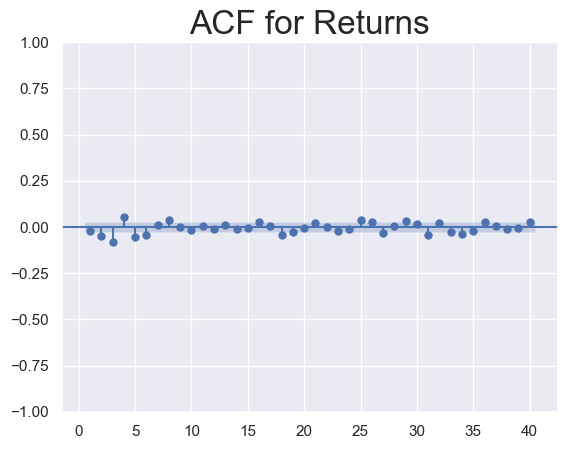

In [70]:
sgt.plot_acf(df.returns[1:], zero=False, lags=40)
plt.title("ACF for Returns", size=24)
plt.show()

In [71]:
model_ret_ma_1 = ARIMA(df['returns'].dropna(), order=(0, 0, 1))  # MA(1)
results_ret_ma_1 = model_ret_ma_1.fit()
results_ret_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -7929.595
Date:                Mon, 09 Dec 2024   AIC                          15865.190
Time:                        21:33:29   BIC                          15884.754
Sample:                    01-10-1994   HQIC                         15872.045
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.146      0.252      -0.013       0.051
ma.L1         -0.0257      0.009     -3.018      0.003      -0.042      -0.009
sigma2         1.3789      0.014     99.990      0.000       1.352       1.406
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7852.85
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               2.04   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [72]:
model_ret_ma_2 = ARIMA(df['returns'].dropna(), order=(0, 0, 2))
results_ret_ma_2 = model_ret_ma_2.fit()
print(results_ret_ma_2.summary())
print("\nLLR test p-value =", LLR_test(results_ret_ma_1, results_ret_ma_2))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -7922.864
Date:                Mon, 09 Dec 2024   AIC                          15853.728
Time:                        21:33:30   BIC                          15879.812
Sample:                    01-10-1994   HQIC                         15862.868
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.204      0.228      -0.012       0.049
ma.L1         -0.0327      0.009     -3.760      0.000      -0.050      -0.016
ma.L2         -0.0502      0.008     -6.416      0.0

In [73]:
model_ret_ma_3 = ARIMA(df['returns'].dropna(), order=(0, 0, 3))
results_ret_ma_3 = model_ret_ma_3.fit()
print(results_ret_ma_3.summary())
print("\nLLR test p-value =", LLR_test(results_ret_ma_2, results_ret_ma_3))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -7904.317
Date:                Mon, 09 Dec 2024   AIC                          15818.634
Time:                        21:33:31   BIC                          15851.240
Sample:                    01-10-1994   HQIC                         15830.060
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.296      0.195      -0.010       0.048
ma.L1         -0.0203      0.009     -2.334      0.020      -0.037      -0.003
ma.L2         -0.0556      0.008     -7.032      0.0

In [74]:
model_ret_ma_4 = ARIMA(df['returns'].dropna(), order=(0, 0, 4))
results_ret_ma_4 = model_ret_ma_4.fit()
print(results_ret_ma_4.summary())
print("\nLLR test p-value =", LLR_test(results_ret_ma_3, results_ret_ma_4))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 4)   Log Likelihood               -7898.773
Date:                Mon, 09 Dec 2024   AIC                          15809.547
Time:                        21:33:32   BIC                          15848.674
Sample:                    01-10-1994   HQIC                         15823.257
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.236      0.217      -0.011       0.049
ma.L1         -0.0203      0.009     -2.239      0.025      -0.038      -0.003
ma.L2         -0.0551      0.008     -6.835      0.0

In [75]:
model_ret_ma_5 = ARIMA(df['returns'].dropna(), order=(0, 0, 5))
results_ret_ma_5 = model_ret_ma_5.fit()
print(results_ret_ma_5.summary())
print("\nLLR test p-value =", LLR_test(results_ret_ma_4, results_ret_ma_5))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 5)   Log Likelihood               -7892.823
Date:                Mon, 09 Dec 2024   AIC                          15799.645
Time:                        21:33:33   BIC                          15845.294
Sample:                    01-10-1994   HQIC                         15815.641
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.282      0.200      -0.010       0.048
ma.L1         -0.0262      0.009     -2.839      0.005      -0.044      -0.008
ma.L2         -0.0497      0.008     -6.147      0.0

In [76]:
model_ret_ma_6 = ARIMA(df['returns'].dropna(), order=(0, 0, 6))
results_ret_ma_6 = model_ret_ma_6.fit()
print(results_ret_ma_6.summary())
print("\nLLR test p-value =", LLR_test(results_ret_ma_5, results_ret_ma_6))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 6)   Log Likelihood               -7889.221
Date:                Mon, 09 Dec 2024   AIC                          15794.442
Time:                        21:33:35   BIC                          15846.612
Sample:                    01-10-1994   HQIC                         15812.723
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.014      1.318      0.188      -0.009       0.047
ma.L1         -0.0237      0.009     -2.562      0.010      -0.042      -0.006
ma.L2         -0.0486      0.008     -5.982      0.0

In [77]:
model_ret_ma_7 = ARIMA(df['returns'].dropna(), order=(0, 0, 7))
results_ret_ma_7 = model_ret_ma_7.fit()
print(results_ret_ma_7.summary())
print("\nLLR test p-value =", LLR_test(results_ret_ma_6, results_ret_ma_7))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 7)   Log Likelihood               -7889.046
Date:                Mon, 09 Dec 2024   AIC                          15796.091
Time:                        21:33:37   BIC                          15854.782
Sample:                    01-10-1994   HQIC                         15816.657
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.303      0.193      -0.010       0.047
ma.L1         -0.0247      0.009     -2.645      0.008      -0.043      -0.006
ma.L2         -0.0488      0.008     -6.000      0.0

In [78]:
model_ret_ma_8 = ARIMA(df['returns'].dropna(), order=(0, 0, 8))
results_ret_ma_8 = model_ret_ma_8.fit()
print(results_ret_ma_8.summary())
print("\nLLR test p-value =", LLR_test(results_ret_ma_7, results_ret_ma_8))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 8)   Log Likelihood               -7885.603
Date:                Mon, 09 Dec 2024   AIC                          15791.205
Time:                        21:33:39   BIC                          15856.417
Sample:                    01-10-1994   HQIC                         15814.056
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.253      0.210      -0.011       0.048
ma.L1         -0.0238      0.009     -2.527      0.011      -0.042      -0.005
ma.L2         -0.0495      0.008     -6.053      0.0

In [79]:
LLR_test(results_ret_ma_6, results_ret_ma_8, DF = 2)

0.027

In [80]:
df.loc[:, 'res_ret_ma_8'] = results_ret_ma_8.resid[1:]

In [81]:
print("the mean of the residuals is " + str(round(df.res_ret_ma_8.mean(), 3)) + 
      "\nthe variance of the residuals is " + str(round(df.res_ret_ma_8.var(), 3)))


the mean of the residuals is -0.0
the variance of the residuals is 1.356


In [82]:
round(sqrt(df.res_ret_ma_8.var()),3)


1.164

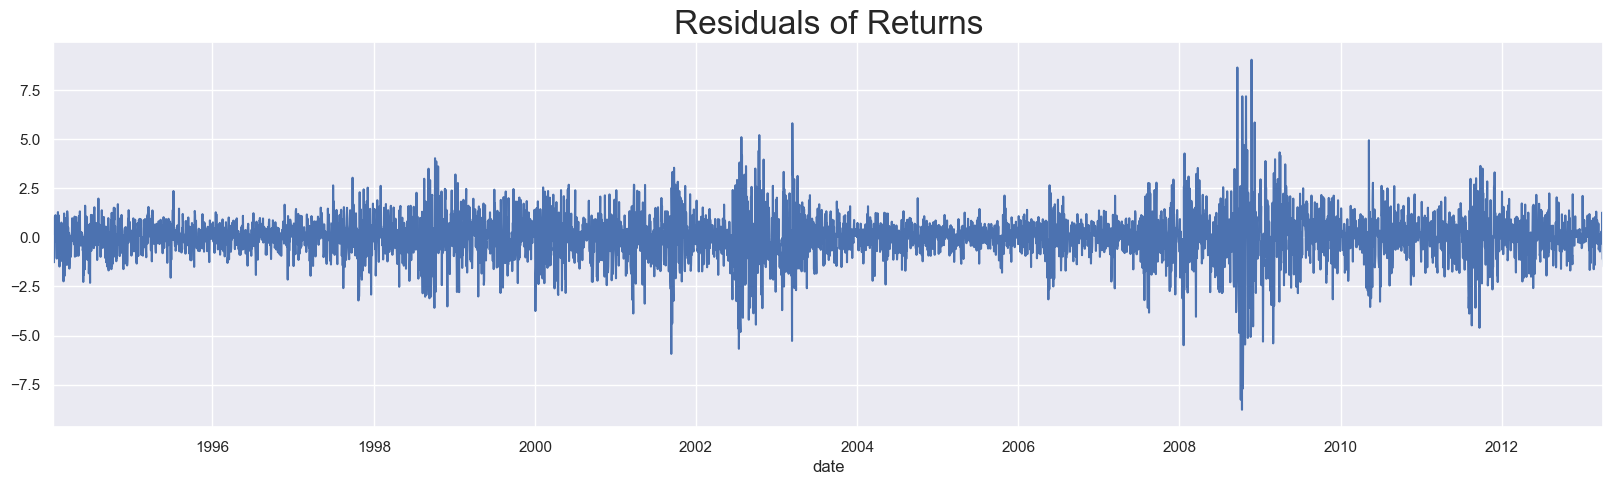

In [83]:
df.res_ret_ma_8[1:].plot(figsize=(20,5))
plt.title("Residuals of Returns", size=24)
plt.show()

In [84]:
sts.adfuller(df.res_ret_ma_8[2:])

(-70.83537125466934,
 0.0,
 0,
 5018,
 {'1%': -3.4316538358533277,
  '5%': -2.8621161549128313,
  '10%': -2.567076687880585},
 15684.052217389439)

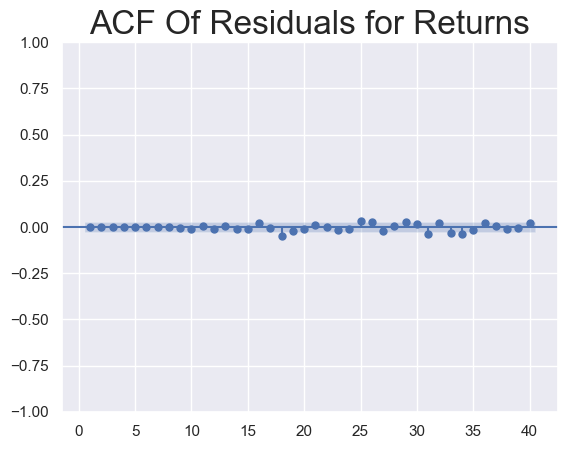

In [85]:
sgt.plot_acf(df.res_ret_ma_8[2:], zero=False, lags=40)
plt.title("ACF Of Residuals for Returns", size=24)
plt.show()

In [86]:
bench_ret = df.returns.iloc[1]
df.loc[:, 'norm_ret'] = df['returns'].div(bench_ret).mul(100)



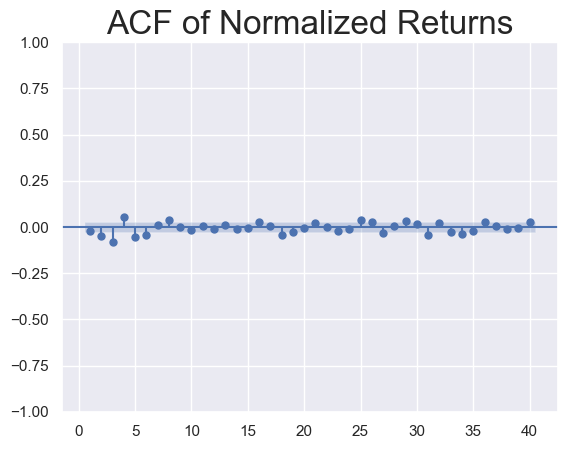

In [87]:
sgt.plot_acf(df.norm_ret[1:], zero=False, lags=40)
plt.title("ACF of Normalized Returns", size=24)
plt.show()

In [88]:
model_ret_ma_8 = ARIMA(df['returns'].dropna(), order=(0, 0, 8))
results_ret_ma_8 = model_ret_ma_8.fit()
results_ret_ma_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 8)   Log Likelihood               -7885.603
Date:                Mon, 09 Dec 2024   AIC                          15791.205
Time:                        21:33:45   BIC                          15856.417
Sample:                    01-10-1994   HQIC                         15814.056
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.253      0.210      -0.011       0.048
ma.L1         -0.0238      0.009     -2.527      0.011      -0.042      -0.005
ma.L2         -0.0495      0.008     -6.053      0.000      -0.066      -0.033
ma.L3         -0.0847      0.008    -10.308      0.000      -0.101      -0.069
ma.L4          0.0488      0.009      5.615      0.000       0.032       0.066
ma.L5         -0.0518      0.008     -6.304      0.000      -0.068      -0.036
ma.L6         -0.0402      0.009     -4.411      0.000      -0.058      -0.022
ma.L7          0.0083      0.009      0.938      0.348      -0.009       0.026
ma.L8          0.0365      0.009      3.881      0.000       0.018       0.055
sigma2         1.3550      0.015     91.305      0.000       1.326       1.384
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6440.47
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [89]:
df.loc[:, 'res_norm_ret_ma_8'] = results_ret_ma_8.resid[1:]

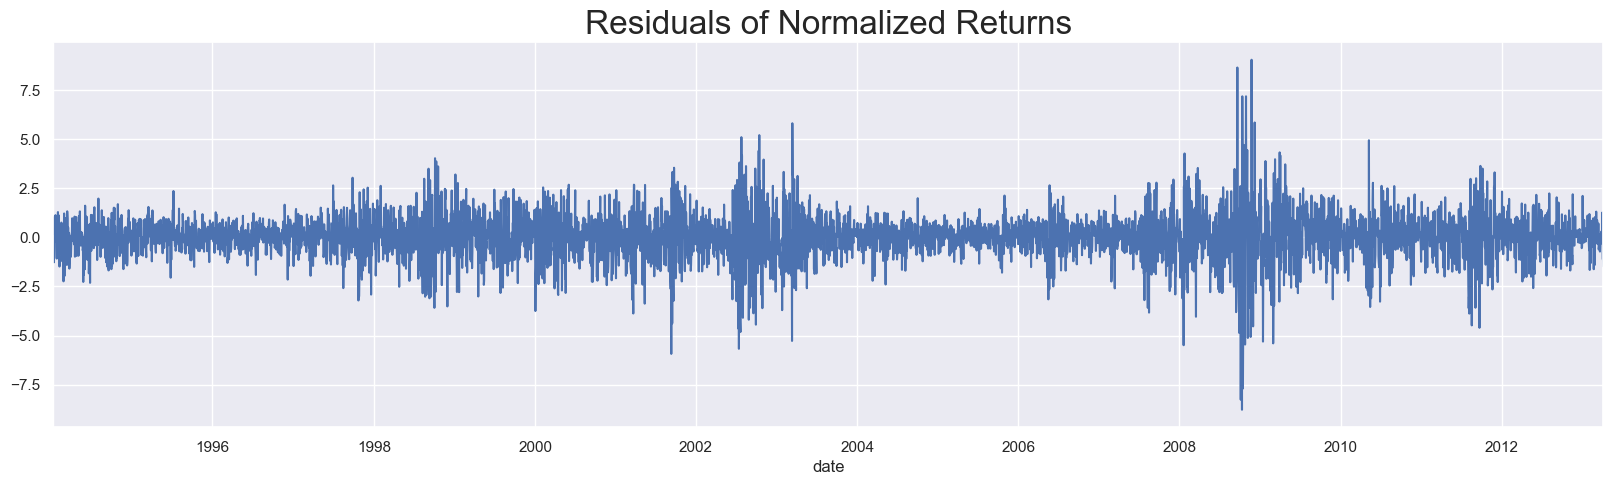

In [90]:
df.res_norm_ret_ma_8[1:].plot(figsize=(20,5))
plt.title("Residuals of Normalized Returns", size=24)
plt.show()

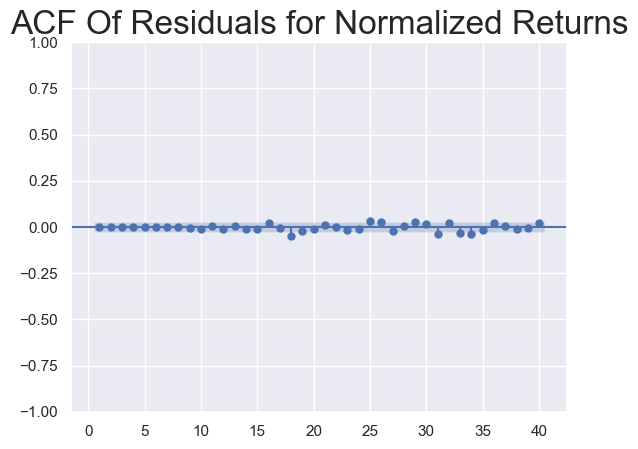

In [91]:
sgt.plot_acf(df.res_norm_ret_ma_8[2:], zero=False, lags=40)
plt.title("ACF Of Residuals for Normalized Returns", size=24)
plt.show()

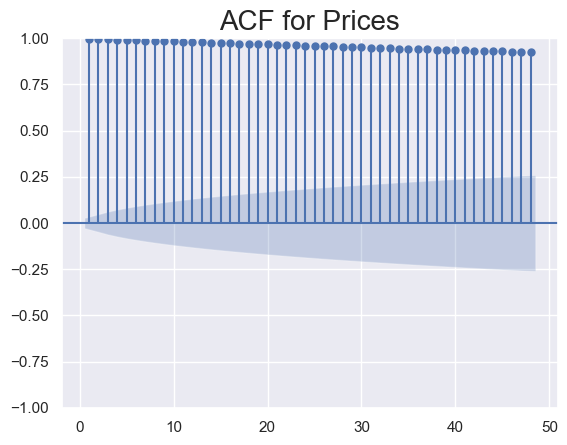

In [92]:
sgt.plot_acf(df.market_value, zero=False, lags=48)
plt.title("ACF for Prices", size=20)
plt.show()


In [93]:
model_ma_1 = ARIMA(df['market_value'], order=(0, 0, 1))  # AR=0, I=0, MA=1
results_ma_1 = model_ma_1.fit()
results_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(0, 0, 1)   Log Likelihood              -38629.000
Date:                Mon, 09 Dec 2024   AIC                          77264.000
Time:                        21:33:52   BIC                          77283.564
Sample:                    01-07-1994   HQIC                         77270.856
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6316     15.834    321.441      0.000    5058.598    5120.665
ma.L1          0.9573      0.004    231.410      0.000       0.949       0.965
sigma2      2.817e+05   8160.541     34.519      0.000    2.66e+05    2.98e+05
===================================================================================
Ljung-Box (L1) (Q):                4221.10   Jarque-Bera (JB):               291.39
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                            -0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""